# 010: SVM

In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np

sys.path.append("../")
from metrics import f_score, auc_roc
from models import LinearSVM
from visualizations import plot_roc, plot_losses
from implementations import sigmoid
from model_selection import test_val_split, find_best_threshold

%load_ext autoreload
%autoreload 2

In [2]:
train = np.load("../data/dataset_prep/train.npz")
x_train = train["x_train"]
y_train = train["y_train"]

Iteration 0, Training Loss: 1.0
Iteration 1, Training Loss: 0.9887626467494214
Iteration 2, Training Loss: 0.9775533868819688
Iteration 3, Training Loss: 0.9663721501641853
Iteration 4, Training Loss: 0.9552188665381959
Iteration 5, Training Loss: 0.9440934661212717
Iteration 6, Training Loss: 0.9329958792053896
Iteration 7, Training Loss: 0.9219260362567974
Iteration 8, Training Loss: 0.9108838679155769
Iteration 9, Training Loss: 0.8998693049952089
Iteration 10, Training Loss: 0.8888822784821423
Iteration 11, Training Loss: 0.8779227195353582
Iteration 12, Training Loss: 0.8669922689705206
Iteration 13, Training Loss: 0.8561005615755009
Iteration 14, Training Loss: 0.8452570790581357
Iteration 15, Training Loss: 0.8344700096837784
Iteration 16, Training Loss: 0.8237528293471637
Iteration 17, Training Loss: 0.8131275544442321
Iteration 18, Training Loss: 0.8026146509530293
Iteration 19, Training Loss: 0.7922255365779246
Iteration 20, Training Loss: 0.7819694913912052
Iteration 21, Tra

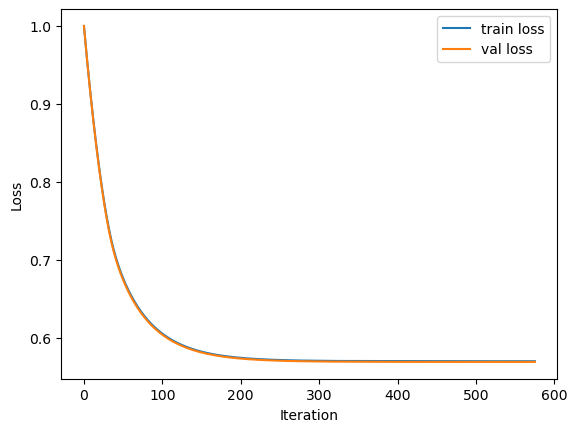

In [28]:
svm = LinearSVM(metric=f_score)
num_samples = 100000
train_losses, val_losses = svm.train(x_train[:num_samples], y_train[:num_samples], verbose=True)
plot_losses(train_losses, val_losses)

In [29]:
svm._lambda, svm.lr

(2.0, 0.01)

In [30]:
# predict
y_pred = svm.predict(x_train[num_samples:2*num_samples], scores=True)
print("AUC-ROC:", auc_roc(y_pred, y_train[num_samples:2*num_samples]))

AUC-ROC: 0.8322518214927646


(array([15063., 30484., 19165., 13745.,  8859.,  5855.,  3884.,  2077.,
          770.,    98.]),
 array([0.23306723, 0.29769956, 0.36233189, 0.42696422, 0.49159655,
        0.55622888, 0.62086121, 0.68549354, 0.75012587, 0.8147582 ,
        0.87939053]),
 <BarContainer object of 10 artists>)

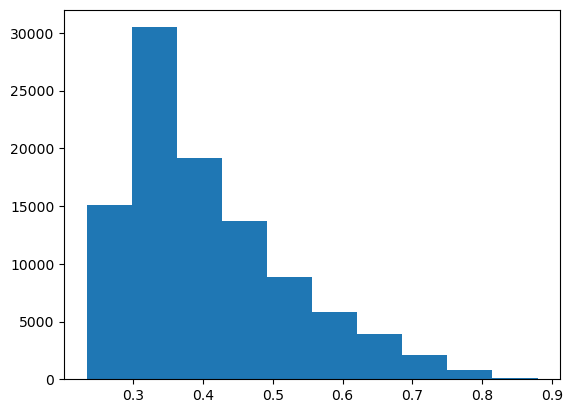

In [13]:
plt.hist(y_pred)

Threshold: 0.00, F1 Score: 0.1600
Threshold: 0.01, F1 Score: 0.1600
Threshold: 0.02, F1 Score: 0.1600
Threshold: 0.03, F1 Score: 0.1600
Threshold: 0.04, F1 Score: 0.1600
Threshold: 0.05, F1 Score: 0.1600
Threshold: 0.06, F1 Score: 0.1600
Threshold: 0.07, F1 Score: 0.1600
Threshold: 0.08, F1 Score: 0.1600
Threshold: 0.09, F1 Score: 0.1600
Threshold: 0.10, F1 Score: 0.1600
Threshold: 0.11, F1 Score: 0.1600
Threshold: 0.12, F1 Score: 0.1600
Threshold: 0.13, F1 Score: 0.1600
Threshold: 0.14, F1 Score: 0.1600
Threshold: 0.15, F1 Score: 0.1600
Threshold: 0.16, F1 Score: 0.1600
Threshold: 0.17, F1 Score: 0.1600
Threshold: 0.18, F1 Score: 0.1600
Threshold: 0.19, F1 Score: 0.1600
Threshold: 0.20, F1 Score: 0.1600
Threshold: 0.21, F1 Score: 0.1600
Threshold: 0.22, F1 Score: 0.1600
Threshold: 0.23, F1 Score: 0.1601
Threshold: 0.24, F1 Score: 0.1602
Threshold: 0.25, F1 Score: 0.1609
Threshold: 0.26, F1 Score: 0.1634
Threshold: 0.27, F1 Score: 0.1689
Threshold: 0.28, F1 Score: 0.1777
Threshold: 0.2

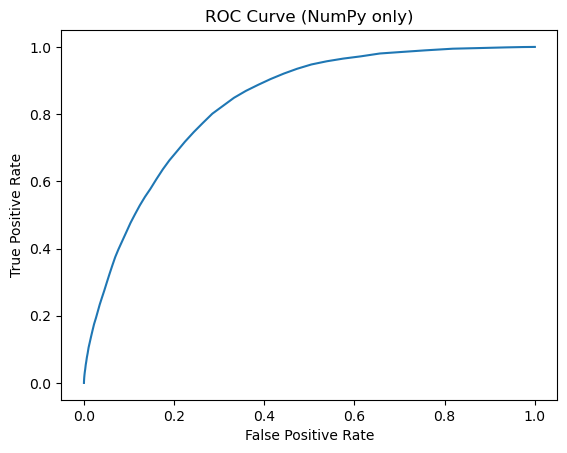

In [31]:
plot_roc(y_pred, y_train[num_samples:2*num_samples], )

In [30]:
y_pred = svm.predict(x_train[num_samples:2*num_samples])
print("F1 Score:", f_score(y_pred, y_train[num_samples:2*num_samples]))

F1 Score: 0.3661413856853596
